<a href="https://colab.research.google.com/github/Demosthene-OR/Student-AI-and-Data-Management/blob/main/02_analysis_quali_and_temporal_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://prof.totalenergies.com/wp-content/uploads/2024/09/TotalEnergies_TPA_picto_DegradeRouge_RVB-1024x1024.png" height="150" width="150">
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Exploratory statistics </h1> 
<h2 style = "text-align:center"> Descriptive analysis of qualitative variables in a dataset </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

### Context and objective

> Analyzing qualitative variables is an important step in understanding data, as they often provide valuable information about the interaction between variables in the dataset. <br>
> In general, they are more difficult to manipulate than numerical variables, and it is important to observe their relationship with the latter. <br>
> 
>
> The objective of this notebook is to **determine the modalities of a qualitative variable** and to see how it **interacts with a quantitative and temporal variable**. <br>
> This notebook will also familiarize you with simple methods of data management and date column management, as well as teach you how to graphically display the evolution of a measurement over time and the different modalities of a qualitative variable.
>
> Let's start by importing the packages.


* **(a)** Import the **`pandas`** and **`numpy`** packages under their usual aliases.
* **(b)** Load the data from the **`‘bike.csv’`** file into a table named **`df`** and display the first 5 rows.

> The dataset contains information on bike rentals in Porto during 2011 and 2012. For each row, we have the following information: 
>
> |Variable|Description|
> |----------|------------|
> |**`‘datetime’`**|the date and time when the rentals took place|
> |**`‘business_day’`**|0 - if the day is a business day 1 - otherwise|
> |**`‘weather_conditions’`**| (1) clear, (2) cloudy, (3) rain or storm, (4) snow|
> |**`‘temperature’`**| the average temperature for the day (in °C) |
> |**`‘humidity’`**| relative humidity |
> |**`‘wind_speed’`**| wind speed (in km/h)|
> |**`‘holidays’`**| whether or not it is a holiday |
> |**`‘season’`**| the season |
> |**`‘no_rentals’`**| the number of rentals at that time |





In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/data/"
df = pd.read_csv(url+"bike.csv")
df.head()


,datetime,business_day,weather_conditions,temperature,humidity,wind_speed,holidays,season,no_rentals
0,2011-01-01 00:00:00,0,(1) temps clair,9.84,81,0.0,non,printemps,16
1,2011-01-01 01:00:00,0,(1) temps clair,9.02,80,0.0,non,printemps,40
2,2011-01-01 02:00:00,0,(1) temps clair,9.02,80,0.0,non,printemps,32
3,2011-01-01 03:00:00,0,(1) temps clair,9.84,75,0.0,non,printemps,13
4,2011-01-01 04:00:00,0,(1) temps clair,9.84,75,0.0,non,printemps,1



* **(c)** Afficher le type de chaque variable du jeu de données **`df`** en utilisant l'attribut **`dtypes`** de `pandas.DataFrame`. 



In [2]:
df.dtypes



datetime               object
business_day            int64
weather_conditions     object
temperature           float64
humidity                int64
wind_speed            float64
holidays               object
season                 object
no_rentals              int64
dtype: object


<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center" > 1. Analyse descriptive d'une variable qualitative </h3>  
<hr style="border-width:2px;border-color:#75DFC1">

* **(d)** Déterminer les **variables catégorielles** et les stocker dans un tableau **`cat_data`**.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
    On pourra s'aider de la fonction <code>pandas.DataFrame.select_dtypes()</code> et de l'attribut <code>include</code> auquel on renseignera une liste du ou des type(s) qu'on souhaite garder (ici "object" ou "O").
</div>




In [3]:
cat_data = df.select_dtypes(include='object')
cat_data.head()



,datetime,weather_conditions,holidays,season
0,2011-01-01 00:00:00,(1) temps clair,non,printemps
1,2011-01-01 01:00:00,(1) temps clair,non,printemps
2,2011-01-01 02:00:00,(1) temps clair,non,printemps
3,2011-01-01 03:00:00,(1) temps clair,non,printemps
4,2011-01-01 04:00:00,(1) temps clair,non,printemps



* **(e)** À l'aide de la méthode **`value_counts`** afficher le dénombrement de différentes modalités sur les variables **`"conditions_meteo"`**, **`"vacances"`**, **`"saison"`**.



In [22]:
print('weather_conditions:\n',cat_data['weather_conditions'].value_counts())
print("------------------------------")
print('holidays:',cat_data['holidays'].value_counts())
print("------------------------------")
print('season:',cat_data['season'].value_counts())


weather_conditions:
 (1) temps clair     7192
(2) nuageux         2834
(3) pluie            859
(4) orage, neige       1
Name: weather_conditions, dtype: int64
------------------------------
holidays: non    10575
oui      311
Name: holidays, dtype: int64
------------------------------
season: hiver        2734
ete          2733
automn       2733
printemps    2686
Name: season, dtype: int64



> **`value_counts`** est couramment utilisé pour visualiser très rapidement les modalités d'une variable.
On peut également retrouver très facilement la modalité la plus fréquente d'une variable qualitative avec la méthode **`mode`**.

* **(f)**  Afficher **la modalité la plus fréquente** de la colonne **`"saison"`** et vérifier que cela correspond bien avec le résultat trouvé précédemment.



In [5]:
df['season'].mode()
# Indeed, winter is the most frequent mode
# (it appears 2,734 times according to the result of .value_counts())


0    hiver
Name: season, dtype: object


 > Dans un premier temps, il est important de bien identifier et étudier la **fréquence des modalités**. La manière la plus rapide est en faisant **`.value_counts(normalize = True)`**. Ce paramètre permet de normaliser ces valeurs et donc calculer les pourcentages de chaque modalité. 
 
 * **(g)** Afficher les fréquences de différentes modalités des variables **`"conditions_meteo"`**, **`"vacances"`** et **`"saison"`**.



In [6]:
print(cat_data["weather_conditions"].value_counts(normalize = True))
print("------------------------------")
print(cat_data["holidays"].value_counts(normalize = True))
print("------------------------------")
print(cat_data["season"].value_counts(normalize = True))


(1) temps clair     0.660665
(2) nuageux         0.260334
(3) pluie           0.078909
(4) orage, neige    0.000092
Name: weather_conditions, dtype: float64
------------------------------
non    0.971431
oui    0.028569
Name: holidays, dtype: float64
------------------------------
hiver        0.251148
ete          0.251056
automn       0.251056
printemps    0.246739
Name: season, dtype: float64



<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center" > 2. Interaction entre une variable qualitative et une variable quantitative </h3>  
<hr style="border-width:2px;border-color:#75DFC1">

> D'après la question précédente on peut constater que pendant les vacances il y a beaucoup moins de locations de vélos. 
Quant aux saisons, la répartition est uniforme.<br>
>
> Pour ajouter plus de contexte, il serait intéressant de créer une variable qualitative qui encadre les températures en fonction de **labels** données.

* **(h)** Dans une nouvelle variable **`"temperature_labels"`**, découpez les valeurs de la colonne **`"temperature"`** en **4 classes distinctes** avec pour **labels** $0, 1, 2, 3$ en fonction de quartiles de la variable **`"temperature"`**.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
À utiliser <code>pandas.qcut(colonne, labels = [...], q = 4)</code>.
</div>



In [7]:
df['temperature_labels']=pd.qcut(df['temperature'], labels = ['0','1','2','3'], q = 4)
df.head()




,datetime,business_day,weather_conditions,temperature,humidity,wind_speed,holidays,season,no_rentals,temperature_labels
0,2011-01-01 00:00:00,0,(1) temps clair,9.84,81,0.0,non,printemps,16,0
1,2011-01-01 01:00:00,0,(1) temps clair,9.02,80,0.0,non,printemps,40,0
2,2011-01-01 02:00:00,0,(1) temps clair,9.02,80,0.0,non,printemps,32,0
3,2011-01-01 03:00:00,0,(1) temps clair,9.84,75,0.0,non,printemps,13,0
4,2011-01-01 04:00:00,0,(1) temps clair,9.84,75,0.0,non,printemps,1,0


In [8]:
df['temperature_labels'] = pd.qcut(df['temperature'], labels = [0, 1, 2, 3], q = 4)
df.head()



,datetime,business_day,weather_conditions,temperature,humidity,wind_speed,holidays,season,no_rentals,temperature_labels
0,2011-01-01 00:00:00,0,(1) temps clair,9.84,81,0.0,non,printemps,16,0
1,2011-01-01 01:00:00,0,(1) temps clair,9.02,80,0.0,non,printemps,40,0
2,2011-01-01 02:00:00,0,(1) temps clair,9.02,80,0.0,non,printemps,32,0
3,2011-01-01 03:00:00,0,(1) temps clair,9.84,75,0.0,non,printemps,13,0
4,2011-01-01 04:00:00,0,(1) temps clair,9.84,75,0.0,non,printemps,1,0



* **(i)**  Stocker dans une nouvelle variable **`group_holidays_labels`** **le nombre total de locations** en fonction des variables qualitatives **`"temperature_labels"`**  et **`"holidays"`**. Afficher ce nouveau dataframe.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
<code>pandas.groupby([liste_colonnes]).agg({"colonne1":"opération", "colonne2":"opération", ..})</code> <br>
 
permet de grouper les données en fonction de la <code>[liste_colonnes]</code> et d'aggréger en fonction de <code>colonne1, colonne2, ...</code>, en apliquant l'opération saisie (cela peut être <code><b>sum, mean, min, max, unique</b></code>, etc.).
</div>



In [10]:
group_holidays_labels = df.groupby(['holidays', 'temperature_labels'])\
                        .agg({'no_rentals': 'sum'})

# Note: the backslash “\” at the end of the first line of code
# allows operations to continue on the second line. 
# This can be useful if visibility is limited and you don't want to 
# chain all operations on the same line.

# We calculate the sum of the nb_locations column to get the total number 
# of rentals.
print(group_holidays_labels)


                             no_rentals
holidays temperature_labels            
non      0                       294042
         1                       456152
         2                       553940
         3                       723534
oui      0                         7923
         1                        10185
         2                        10630
         3                        29070



> On observe que pendant les jours de vacances et pour un label de température égal à $3$, c'est-à-dire que la température est supérieure au 3e quartile (ici $26.24°C$ en utilisant `df["temperature"].describe()`), il y a eu un nombre total de $29070$ locations.
>
> Pour ajouter une nouvelle colonne qui va calculer aussi le **nombre moyen** de locations, on peut saisir une **liste des fonctions** à exécuter (dans le paramètre de **`.agg()`**) pour la variable numérique **`"nb_locations"`**.

* **(j)** Créer une nouvelle variable **`group_vacances_labels2`** en ajoutant au groupby précédent une colonne avec la moyenne de nombres de locations en fonction des colonnes **`"temperature_labels"`** et **`"vacances"`**. Afficher-là.



In [12]:
group_holidays_labels2 = df.groupby(['holidays', 'temperature_labels']).agg({'no_rentals': ['sum', 'mean']})
print(group_holidays_labels2)



                            no_rentals            
                                   sum        mean
holidays temperature_labels                       
non      0                      294042  103.865065
         1                      456152  172.262840
         2                      553940  216.382812
         3                      723534  285.305205
oui      0                        7923   83.400000
         1                       10185  166.967213
         2                       10630  216.938776
         3                       29070  274.245283



> Pendant les jours où il n'y a pas des vacances et si la température est supérieure à $26.24°$ (label 3), il y a approximativement $285$ locations de vélos en moyenne.
> 
> Ce type de statistiques est souvent utile et les données peuvent être représentées facilement de manière **graphique**.
> 
> Pour affiner notre analyse, dans la suite nous allons gérer également la dimension **temporelle**.
>
<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center" >  3. Analyser une variable qualitative et quantitative en ajoutant la dimension temporelle</h3>  
<hr style="border-width:2px;border-color:#75DFC1">

> Pour intégrer le **temps** dans l'analyse de différentes variables nous allons manipuler des objets de type **`pandas.Grouper`**.<br>
>
>**`pandas.groupby(pandas.Grouper()).agg()`** permettra de grouper les données par date et agréger par la variable souhaitée. <br>
>
> Afin de mieux comprendre les résultats et l'intérêt de cet objet, nous allons utiliser la librairie **`matplotlib`** pour réaliser quelques graphiques. Plus tard dans la formation, un module entier sera consacré à la DataViz'.
>
* **(k)** En regardant les types de chaque variable, on observe que la colonne **`datetime`** est en format *object* (donc chaîne de caractères).  <br>
Pour pouvoir travailler avec des objets de type **`pandas.Grouper`**, il faut d'abord mettre la colonne **`datetime`** dans un **format** adapté (*datetime*) à l'aide de la fonction **`to_datetime`** de **`pandas`**. <br>


* **(l)** Vérifiez si cette colonne a été mis dans un bon format. <br>

**Remarque** : Attention à ne pas confondre le nom de la colonne avec son type. Ici, par coïncidence la colonne s'appelle datetime, mais de base elle n'est pas dans un format datetime. 



In [15]:
df["datetime"] = pd.to_datetime(df["datetime"])

# Check the types of columns in the dataframe df:
df.dtypes
# We can clearly see that the datetime column is now in datetime format.



datetime              datetime64[ns]
business_day                   int64
weather_conditions            object
temperature                  float64
humidity                       int64
wind_speed                   float64
holidays                      object
season                        object
no_rentals                     int64
temperature_labels          category
dtype: object


* **(m)** A l'aide de **`pd.Grouper()`**, créez un objet **`grouper_month`** qui prend comme arguments : 
>* `key` le nom de la colonne avec les dates
>* `freq = m` pour indiquer qu'on veut grouper les données par mois, `d` par jour, `w` par semaine, etc.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
À utiliser <code>pandas.Grouper(key = "nom de la colonne", freq = 'm')</code>.
</div>

* **(n)** Afficher le type de la variable **`grouper_month`**.



In [16]:
grouper_month = pd.Grouper(key = 'datetime', freq = 'm')

# le type de la variable grouper_mois: 
type(grouper_month)
# on observe que le type est pandas.core.resample.TimeGrouper
# pour pouvoir retirer l'information de cette variable
# il faut l'utiliser avec la commade .groupby()


pandas.core.resample.TimeGrouper


* **(o)** Créer un objet nommé **`groupby_month_weather`** en groupant par la liste de variables **`[grouper_month, df["weather_conditions"]]`** et en calculant la moyenne de locations sur la colonne **`"no_rentals"`**.<br>
Appliquer la méthode **`unstack`** à la fin pour mettre les données par colonnes. <br>
Afficher les premières 5 lignes du dataframe. <br>


* **(p)** Commenter les résultats obtenus.



In [ ]:
groupby_mois_meteo = df.groupby([grouper_mois, df["conditions_meteo"]]).agg({"nb_locations":"mean"}).unstack()
groupby_mois_meteo.head()



In [17]:
groupby_month_weather = df.groupby([grouper_month, df['weather_conditions']])\
                       .agg({'no_rentals':'mean'}).unstack()


groupby_month_weather.head()
# For the month of January 2011 (every day until January 31)
# there were an average of 59 bike rentals on days when the weather was clear.

# In February 2011, there were an average of 34 bike rentals on days when it rained.


no_rentals                                         
weather_conditions (1) temps clair (2) nuageux   (3) pluie (4) orage, neige
datetime                                                                   
2011-01-31               59.483146   50.260870   28.230769              NaN
2011-02-28               77.596154   75.171717   34.057143              NaN
2011-03-31               95.474638   88.204545   19.500000              NaN
2011-04-30              128.177489  103.084337   65.448276              NaN
2011-05-31              192.539326  154.890511  136.250000              NaN


* **(q)** On peut remarquer que la colonne **`(4) orage, neige`** continent beaucoup de **valeurs manquantes** parce que cette modalité est très rare parmi les données. Remplacer les valeurs manquantes du dataframe **`groupby_mois_meteo`** par la valeur $0$.



In [18]:
groupby_month_weather = groupby_month_weather.fillna(0)
groupby_month_weather.head()


no_rentals                                         
weather_conditions (1) temps clair (2) nuageux   (3) pluie (4) orage, neige
datetime                                                                   
2011-01-31               59.483146   50.260870   28.230769              0.0
2011-02-28               77.596154   75.171717   34.057143              0.0
2011-03-31               95.474638   88.204545   19.500000              0.0
2011-04-30              128.177489  103.084337   65.448276              0.0
2011-05-31              192.539326  154.890511  136.250000              0.0


* **(r)** Utiliser **`.plot(figsize = (20, 4.5), style = 'o-');`** pour afficher dans un graphique les résultats du dataframe précédent avec une taille adapté (paramètre **`figsize`**) et des points marqués sur la figure (paramètre **`style`**). Interpréter ce graphique.



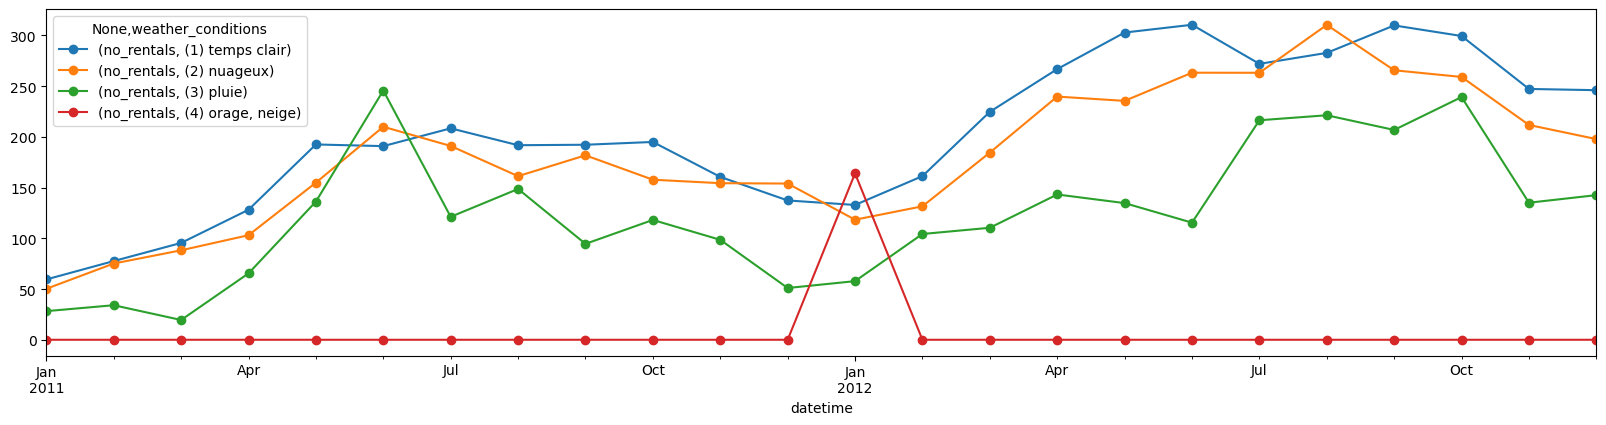

In [19]:
groupby_month_weather.plot(figsize = (20, 4.5), style = 'o-');




> Toutes ces étapes nous ont permis de représenter l’évolution dans le temps du nombre moyen de locations en différenciant par rapport aux conditions météorologiques.
> On remarque que meilleures sont les conditions météorologiques et plus important est le nombre moyen de locations de vélos. En effet la courbe bleue, qui correspond à un temps clair, est au dessus alors que la courbe rouge qui correspond à des conditions météorologiques extrêmes est en dessus de toutes les courbes.  
>
> Il faut aussi remarquer que la variable **`"weather_conditions"`** dépend du temps et que les conditions météorologiques changent en fonction du mois. Il est tout à fait possible qu'en janvier 2012 la location de vélo soit plus forte lorsque les conditions météorologiques atteignent des niveaux extrêmes (modalité `(4) orage, neige` sur la courbe rouge), étant donné qu'il y avait beaucoup de données manquantes pour cette modalité, que l'on vient de remplacer par la valeur $0$, et que les seules valeurs existantes étaient en janvier. <br>
>
> Finalement on peut aussi observer que la courbe bleue est le plus souvent celle qui est située au-dessus des autres. Cela signifie que les locations de vélos sont plus importantes lorsque le temps est clair. Ce n'est pas très étonnant car les conditions météorologiques à Porto sont la plupart du temps bonnes.

